<a href="https://colab.research.google.com/github/Rajibsigdel12345/BankChurn-Kaggle/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [124]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [90]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [94]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255, x_test/255

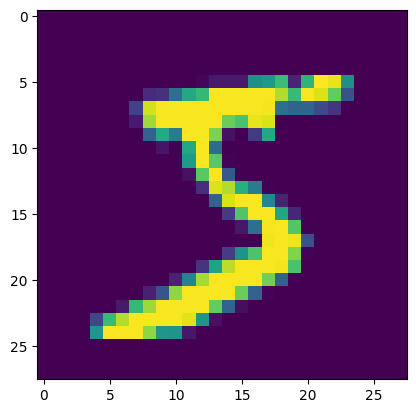

In [35]:
plt.imshow(x_train[0])

In [101]:
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")


In [102]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [103]:
x_train.shape

(60000, 28, 28, 1)

In [160]:
input = tf.keras.layers.Input(shape =(x_train.shape[1:]))
conv1= tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1), activation = 'relu',padding= 'same')(input)
pool1 = tf.keras.layers.MaxPool2D(pool_size = (2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation  = 'relu',padding= 'same')(pool1)
pool2 = tf.keras.layers.MaxPool2D(pool_size = (2,2))(conv2)
F = tf.keras.layers.Flatten()(pool2)
FC = tf.keras.layers.Dense(128,activation = 'relu')(F)
output = tf.keras.layers.Dense(10, activation = 'softmax')(FC)

model = tf.keras.Model(inputs = input, outputs= output)


In [110]:
print(input.shape)
print(conv1.shape)

(None, 28, 28, 1)
(None, 26, 26, 32)


In [161]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
              ,optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),metrics = ['accuracy'])

In [162]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0  

In [116]:
history = model.fit(batch_size = 32,x = x_train, y = y_train,validation_data = test_ds, shuffle= True, epochs = 500, callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 4))

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.0735 - accuracy: 0.9831 - val_loss: 0.1300 - val_accuracy: 0.9770
Epoch 2/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9825 - val_loss: 0.1061 - val_accuracy: 0.9794
Epoch 3/500
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0587 - accuracy: 0.9864 - val_loss: 0.1172 - val_accuracy: 0.9806
Epoch 4/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0625 - accuracy: 0.9859 - val_loss: 0.1241 - val_accuracy: 0.9792
Epoch 5/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0692 - accuracy: 0.9861 - val_loss: 0.1285 - val_accuracy: 0.9821
Epoch 6/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0605 - accuracy: 0.9876 - val_loss: 0.1893 - val_accuracy: 0.9735


In [126]:
Evaluation = pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.073483,0.983100,0.130005,0.9770
1,0.076594,0.982467,0.106073,0.9794
2,0.058720,0.986383,0.117191,0.9806
3,0.062541,0.985900,0.124072,0.9792
4,0.069184,0.986067,0.128465,0.9821
5,0.060491,0.987650,0.189319,0.9735


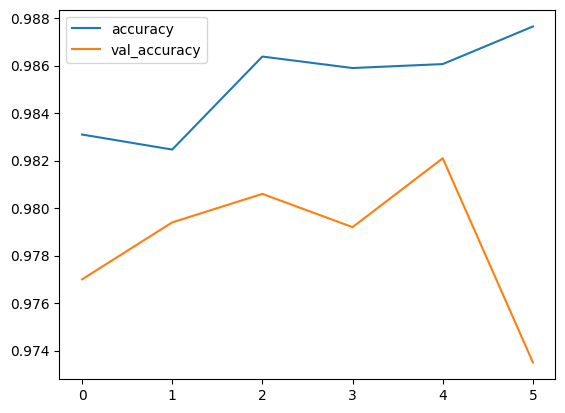

In [133]:
Evaluation[['accuracy','val_accuracy']].plot()

<Axes: >

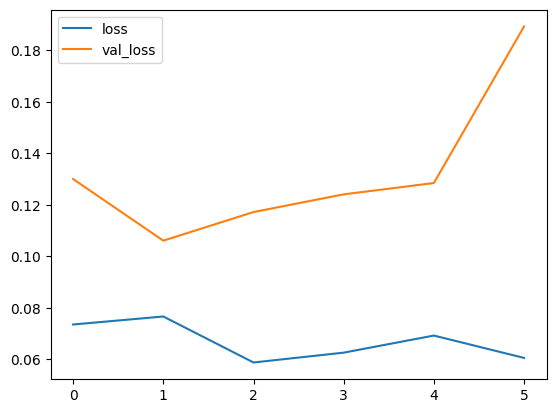

In [134]:
Evaluation[['loss','val_loss']].plot()

In [136]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1893 - accuracy: 0.9735


[0.18931859731674194, 0.9735000133514404]

In [145]:
predictions = model.predict(x_test)
predictions.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [146]:
prediction = [np.argmax(x) for x in predictions]

In [154]:
def display_prediction(image,prediction):
  print(f"The prediction is {prediction}")
  plt.imshow(image)

The prediction is 2


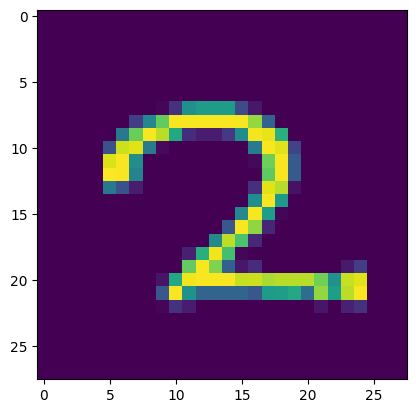

In [159]:
i = 77
display_prediction(x_test[i],prediction[i])